This notebook does some of the scatter plots, regressions, and PCA analyses from:

Herculano-Houzel, Suzana. "[Decreasing sleep requirement with increasing numbers of neurons as a driver for bigger brains and bodies in mammalian evolution]( http://rspb.royalsocietypublishing.org/content/282/1816/20151853)." Proc. R. Soc. B. Vol. 282. No. 1816. The Royal Society, 2015.

The data themselves were taken from the paper (Table 1) and entered into a [Google doc]( https://docs.google.com/spreadsheets/d/1RxptM7tVCtD3HRd2cJwxRa5j8M1vKzXziw9StXWPvA4/edit#gid=0)
I downloaded the spreadsheet to a csv file in the local directory, named it `hh2015.csv`.

In [2]:
# Imports and setup
import warnings
warnings.simplefilter('ignore', Warning)

import numpy as np
import pandas as pd

# I created some helper functions for plotting;
# details don't matter...
import hhplot
reload(hhplot)

# select what plotting library
plot_lib = 'bokeh'  # can also be mpl for matplotlib

# Magic functions so plots will be embedded properly
%matplotlib inline
output_notebook()


In [406]:
%%javascript
// Super magic function to make output windows stop scrolling!
require("notebook/js/outputarea").OutputArea.auto_scroll_threshold = 9999;


<IPython.core.display.Javascript object>

In [3]:
# Load raw data; add/remove columns
def load_data():
    # D/A is computed from D and A.
    # I also prefer O instead of O/N
    data = pd.read_csv('hh2015.csv')
    data = data.drop('D/A', axis=1)
    data['O'] = data['O/N'] * data['Ncx']
    data = data.drop('O/N', axis=1)
    return data
data = load_data()

# But, to do the analyses in the paper, I need D/A and O/N...
data['D/A'] = data['Dcx'] / data['Acx']
data['O/N'] = data['O'] / data['Ncx']
data['N/A'] = data['Ncx'] / data['Acx']
data['log(sleep)'] = data['daily sleep'] # anything that's not 'daily sleep' or 'T' is plotted with log
data.keys()


Index([u'Species', u'Order', u'brain mass', u'daily sleep', u'Ncx', u'Dcx',
       u'Acx', u'T', u'Mcx', u'O', u'D/A', u'O/N'],
      dtype='object')

In [113]:
# Do some sanity checks on the data:

# Brain volume and brain mass should be similar...
data['Vcx'] = data['Acx'] * data['T']
p = hhplot.regress_and_plot('brain mass', 'Vcx', data=data, lib=plot_lib)
hhplot.show_plot(p, lib=plot_lib)



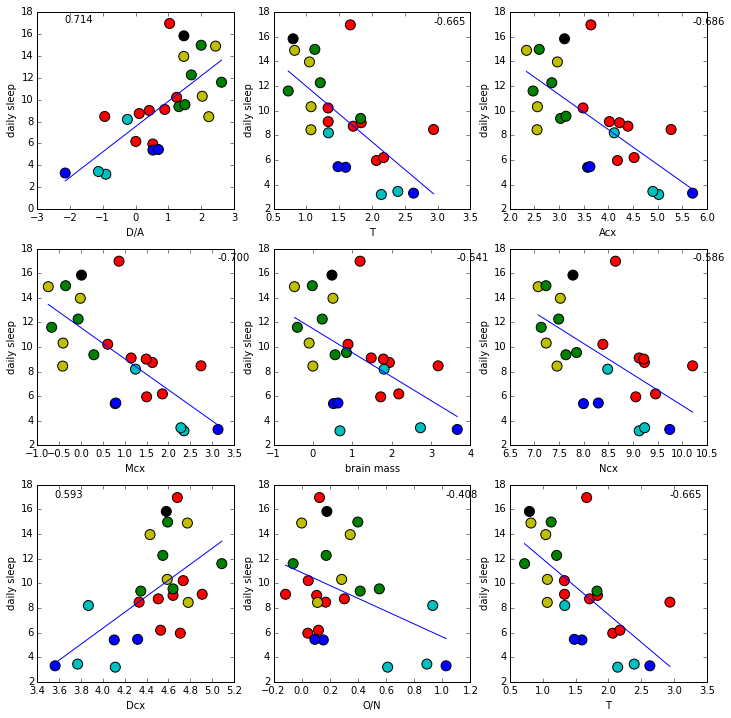

In [114]:
# Now, recreate figure 1
p = hhplot.grid_it([['D/A', 'Mcx', 'Dcx'],
                    ['T', 'brain mass', 'N/A'],
                    ['Acx', 'Ncx', 'O/N']], data=data, lib=plot_lib)
hhplot.show_plot(p, lib=plot_lib)

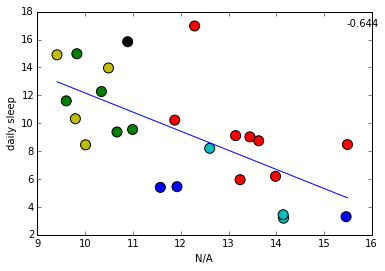

In [19]:
# I am not convinced that D/A is the right measure.
# For concentration yes, but perhaps time to clear metabolites
# depends on total neurons under a unit surface area
p = regressAndPlot('N/A', 'daily sleep', data=data, lib='bokeh')
p.plot_height = 300
p.plot_width = 450
show(p)

In [10]:
# These are the two analyses in the paper.
hhplot.do_pca(['brain mass', 'Mcx', 'Acx', 'daily sleep', 'D/A', 'T'], data=data)
hhplot.do_pca(['brain mass', 'Mcx', 'Acx', 'daily sleep', 'D/A'], data=data)

(24, 6)
['brain mass', 'Mcx', 'Acx', 'daily sleep', 'D/A', 'T']
Total variance explained:  0.954630901878
Variance explained per component [ 0.86920557  0.08542533]
[[-0.40527153 -0.43388166 -0.4311251   0.33225104  0.42756113 -0.41040659]
 [ 0.39327478  0.1006021   0.11240919  0.90238466 -0.03084795  0.08560766]]

(24, 5)
['brain mass', 'Mcx', 'Acx', 'daily sleep', 'D/A']
Total variance explained:  0.974152988916
Variance explained per component [ 0.87230244  0.10185055]
[[-0.4426319  -0.47377792 -0.47289435  0.36745715  0.47006133]
 [ 0.41313894  0.11801663  0.13414825  0.89134351 -0.05384499]]



In [139]:
# How do things look if we separate D and A?
hhplot.do_pca(['brain mass', 'Mcx', 'Acx', 'daily sleep', 'Dcx', 'T'], data=data)
hhplot.do_pca(['brain mass', 'Mcx', 'Acx', 'daily sleep', 'Dcx'], data=data)
# What if we remove A and keep only D/A?
hhplot.do_pca(['brain mass', 'Mcx', 'log(sleep)', 'D/A', 'T'], data=data)
hhplot.do_pca(['brain mass', 'Mcx', 'log(sleep)', 'D/A'], data=data)

(24, 6)
['brain mass', 'Mcx', 'Acx', 'daily sleep', 'Dcx', 'T']
Total variance explained:  0.894634529442
Variance explained per component [ 0.79312848  0.10150605]
[[-0.41965023 -0.44904225 -0.4455458   0.35506151  0.3385861  -0.42782526]
 [ 0.37161501  0.19352747  0.19593235  0.54339419  0.66878913  0.20857558]]

(24, 5)
['brain mass', 'Mcx', 'Acx', 'daily sleep', 'Dcx']
Total variance explained:  0.900127701593
Variance explained per component [ 0.78346539  0.11666231]
[[-0.4594903  -0.49166902 -0.4901551   0.39774265  0.38558916]
 [ 0.44448443  0.24779821  0.25928502  0.53998951  0.61823317]]

(24, 5)
['brain mass', 'Mcx', 'log(sleep)', 'D/A', 'T']
Total variance explained:  0.95611974973
Variance explained per component [ 0.85960934  0.09651041]
[[-0.44286271 -0.47550305  0.38580459  0.47176118 -0.45427489]
 [ 0.48631324  0.11168641  0.85510169  0.00528898  0.14070791]]

(24, 4)
['brain mass', 'Mcx', 'log(sleep)', 'D/A']
Total variance explained:  0.978598164216
Variance explained

In [11]:
# What if we include all data?
data_keys = set(list(load_data().keys()))
data_keys = list(data_keys - set(['Species', 'Order']))
hhplot.do_pca(data_keys, data=data)


(24, 8)
['Ncx', 'O', 'T', 'Dcx', 'Mcx', 'daily sleep', 'Acx', 'brain mass']
Total variance explained:  0.914651418351
Variance explained per component [ 0.82076893  0.09388249]
[[-0.3671566  -0.38401401 -0.36383187  0.26633536 -0.38738848  0.28702619
  -0.38524319 -0.36545168]
 [ 0.36120556  0.12682968  0.05651544  0.71957824  0.07556407  0.52299346
   0.08284249  0.21532066]]



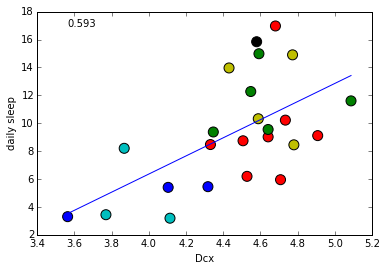

In [12]:
# Daily sleep and Dcx seem to pop out; is A unnecessary?
# How about a regression of D and sleep?
p = hhplot.regress_and_plot('Dcx', 'daily sleep', data=data, lib=plot_lib)
show(p)

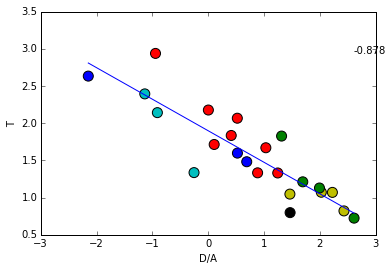

In [13]:
# From the paper: log(D/A) and thickness correlate
fh = plt.figure(figsize=(16, 4))
fh.add_subplot(1,3,1)
regress_and_plot('D/A', 'T', data=data, lib='mpl')

data['1/Ncx'] = 1/data['Ncx']
fh.add_subplot(1,3,2)
regress_and_plot('1/Ncx', 'T', data=data, lib='mpl')

data['A/D'] = 1/data['D/A']
fh.add_subplot(1,3,3)
regress_and_plot('Ncx', 'A/D', data=data, lib='mpl')


In [122]:
# D/A vs Ncx for non-primate species
non_primate_data = data.loc[data['Order'] != 'Primate']
primate_data = data.loc[data['Order'] == 'Primate']
len(non_primate_data)

16

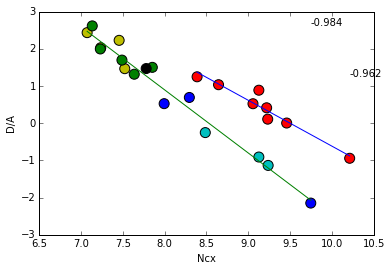

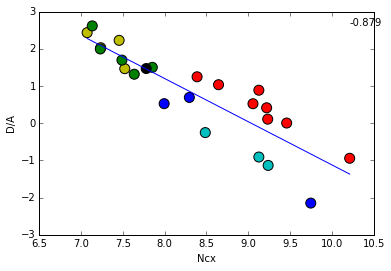

In [123]:
# Figure 3b: primates and other species diverge
regress_and_plot('Ncx', 'D/A', data=primate_data, lib='mpl')
regress_and_plot('Ncx', 'D/A', data=non_primate_data, lib='mpl')
# For comparison
plt.figure()
regress_and_plot('Ncx', 'D/A', data=data, lib='mpl')

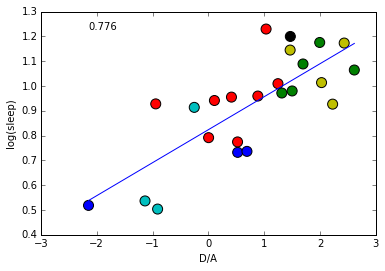

In [124]:
# Now fudge things around so I can do log plots of daily sleep
# Figure 3a
non_primate_data = data.loc[data['Order'] != 'Primate']
primate_data = data.loc[data['Order'] == 'Primate']
regress_and_plot('D/A', 'log(sleep)', data=data, lib='mpl')

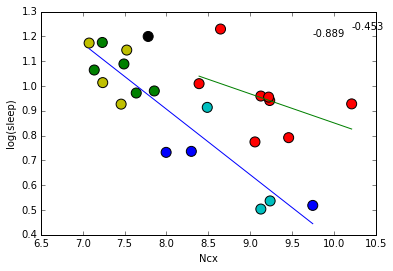

In [125]:
# Figure 3c
regress_and_plot('Ncx', 'log(sleep)', data=non_primate_data, lib='mpl')
regress_and_plot('Ncx', 'log(sleep)', data=primate_data, lib='mpl')


In [126]:
# Not reported in the paper: PCA for non-human primates
hhplot.do_pca(['brain mass', 'Mcx', 'Acx', 'daily sleep', 'D/A', 'T'], data=non_primate_data)
hhplot.do_pca(['brain mass', 'Mcx', 'Acx', 'daily sleep', 'D/A'], data=non_primate_data)


(16, 6)
['brain mass', 'Mcx', 'Acx', 'daily sleep', 'D/A', 'T']
Total variance explained:  0.962313184297
Variance explained per component [ 0.89866806  0.06364512]
[[ 0.39146773  0.42716862  0.42351766 -0.37048746 -0.42505035  0.40863678]
 [ 0.55180046  0.06397606  0.1211758   0.78458399 -0.16647342 -0.18290518]]

(16, 5)
['brain mass', 'Mcx', 'Acx', 'daily sleep', 'D/A']
Total variance explained:  0.976508238487
Variance explained per component [ 0.902345    0.07416324]
[[ 0.43105991  0.46750164  0.46556417 -0.40124852 -0.46677532]
 [ 0.53051503  0.02710619  0.07484298  0.83452336 -0.12565169]]



In [127]:
# Not reported in the paper: PCA for primates
hhplot.do_pca(['brain mass', 'Mcx', 'Acx', 'daily sleep', 'D/A', 'T'], data=primate_data)
hhplot.do_pca(['brain mass', 'Mcx', 'Acx', 'daily sleep', 'D/A'], data=primate_data)

(8, 6)
['brain mass', 'Mcx', 'Acx', 'daily sleep', 'D/A', 'T']
Total variance explained:  0.977050550832
Variance explained per component [ 0.84949438  0.12755618]
[[ 0.43925807  0.44171973  0.4393634  -0.24158375 -0.43756884  0.41117713]
 [ 0.11272997  0.0582231   0.02371267  0.95607934 -0.10560455  0.24103882]]

(8, 5)
['brain mass', 'Mcx', 'Acx', 'daily sleep', 'D/A']
Total variance explained:  0.9967482544
Variance explained per component [ 0.85293486  0.14381339]
[[ 0.47819591  0.48119615  0.48185953 -0.28321816 -0.47684149]
 [ 0.17897783  0.11963738  0.09411535  0.95652282 -0.17280113]]



In [128]:
# Not reported in the paper: PCA with log(sleep)
hhplot.do_pca(['brain mass', 'Mcx', 'Acx', 'log(sleep)', 'D/A', 'T'], data=data)
hhplot.do_pca(['brain mass', 'Mcx', 'Acx', 'log(sleep)', 'D/A'], data=data)

(24, 6)
['brain mass', 'Mcx', 'Acx', 'log(sleep)', 'D/A', 'T']
Total variance explained:  0.958459749058
Variance explained per component [ 0.87715464  0.08130511]
[[-0.40170499 -0.4321511  -0.42964748  0.34368506  0.42736858 -0.40806647]
 [ 0.45966493  0.09264202  0.09639264  0.87101559  0.02480582  0.10747359]]

(24, 5)
['brain mass', 'Mcx', 'Acx', 'log(sleep)', 'D/A']
Total variance explained:  0.978870620999
Variance explained per component [ 0.88226879  0.09660184]
[[-0.43772443 -0.47129809 -0.47071048  0.37976506  0.46955891]
 [ 0.48518268  0.11386465  0.12339135  0.85813345 -0.0037631 ]]



In [131]:
# Regress log(everything) vs. linear(sleep)
cols = ['Ncx', 'O/N', 'D/A', 'N/A', 'O', 'T', 'Dcx', 'Mcx', 'Acx', 'brain mass']
res, lm = hhplot.lin_regress(cols, 'daily sleep', data=data)
res.residues_, res.intercept_, zip(cols, res.coef_)

(23, 10)


(array([], dtype=float64),
 2.6902194072605431e-15,
 [('Ncx', 0.81615331548469716),
  ('O/N', 0.27506067840511483),
  ('D/A', -1.8630848683358359),
  ('N/A', 1.7309836127409233),
  ('O', 0.79985572116533921),
  ('T', 0.95458160038678597),
  ('Dcx', 0.54234351042283679),
  ('Mcx', -8.9148024642987806),
  ('Acx', 2.5768918897850295),
  ('brain mass', -0.12881299695446596)])

In [132]:
# Just use quantities used by HH2015
cols = ['Ncx', 'O/N', 'T', 'D/A', 'Mcx', 'Acx', 'brain mass']
res, lm = lin_regress(cols, 'daily sleep', data)
res.residues_, res.intercept_, zip(cols, res.coef_)

(23, 7)


(8.0418853404472905,
 -9.3094523912832363e-16,
 [('Ncx', 2.3798772764564395),
  ('O/N', 0.50915492468658086),
  ('T', 0.95458160038679118),
  ('D/A', -0.03731821217246184),
  ('Mcx', -8.9148024642988126),
  ('Acx', 4.9018398482433341),
  ('brain mass', -0.1288129969544719)])

In [133]:
# Just use quantities used by HH2015 on log(sleep)
cols = ['Ncx', 'O/N', 'T', 'D/A', 'Mcx', 'Acx', 'brain mass']
res, lm = lin_regress(cols, 'log(sleep)', data=data)
res.residues_, res.intercept_, zip(cols, res.coef_)

(23, 7)


(5.3810499019070814,
 -9.2969626898087689e-16,
 [('Ncx', 2.5559229615350056),
  ('O/N', 0.41299274452287638),
  ('T', 0.65946272122928296),
  ('D/A', -0.15900020524517444),
  ('Mcx', -6.8630871098946002),
  ('Acx', 2.6915234726564528),
  ('brain mass', 0.032599346807023033)])

In [134]:
# Use only the variables from PCA

#All
cols = ['brain mass', 'Mcx', 'Acx', 'D/A', 'T']
res, lm = hhplot.lin_regress(cols, 'log(sleep)', data=data)
print res.residues_, res.intercept_, zip(cols, res.coef_)
print ''

# Primates
res, lm = hhplot.lin_regress(cols, 'log(sleep)', data=primate_data)
print res.residues_, res.intercept_, zip(cols, res.coef_)
print ''

# Non-primates
res, lm = hhplot.lin_regress(cols, 'log(sleep)', data=non_primate_data)
print res.residues_, res.intercept_, zip(cols, res.coef_)
print ''

(23, 5)
6.3819884588 -3.01565382623e-16 [('brain mass', 0.81167188989633565), ('Mcx', -1.3092564526059456), ('Acx', 1.0872793867143513), ('D/A', 1.198345974468628), ('T', -0.10006304483811396)]

(8, 5)
1.06478730408 -1.3849644694e-15 [('brain mass', 13.188768749866211), ('Mcx', 0.52620480162388095), ('Acx', -12.94053406344409), ('D/A', -0.65414270008445419), ('T', -2.0937503456133992)]

(15, 5)
1.74802341285 -1.76562843109e-15 [('brain mass', 0.13480378823903061), ('Mcx', -6.7708133246154274), ('Acx', 3.5741160867971078), ('D/A', -1.8407460180099462), ('T', 0.3909475720702944)]



In [135]:
# Just regress log(D/A) and log(sleep)
cols = ['D/A']
res, lm = hhplot.lin_regress(cols, 'log(sleep)', data=data)
res.residues_, res.intercept_, zip(cols, res.coef_)

(24, 1)


(9.5655913115879798, -5.6455638809538444e-17, [('D/A', 0.77552156343360401)])

In [136]:
# Am I understanding resid_? It doesn't seem to be the residual...
((np.log10(data['daily sleep']) - np.log10(data['D/A']) * 0.775521)**2).sum()


17.144402713478186